# Task 1: Data Preparation


In [1]:
# Start from here to write your code for Task 1. Please also feel free to add more cells in this ipynb file. 


In [2]:
# The / is necessary for google colab. Remove the / when working with anaconda
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

sns.set_theme()

colindex = {
    "Manufacturer": 0,
    "Model": 1,
    "Price": 2,
    "Transmission": 3,
    "Power": 4,
    "Engine CC": 5,
    "Fuel": 6,
    "Male": 7,
    "Female": 8,
    "Unknown": 9,
    "Total": 10
}

In [3]:
# Import all data and combine into one data frame

data = ['Manufacturer.csv', 
        'Model.csv', 
        'Price.csv', 
        'Transmission.csv', 
        'Power.csv', 
        'Engine CC.csv', 
        'Fuel.csv', 
        'Male.csv', 
        'Female.csv', 
        'Unknown.csv', 
        'Total.csv']

frame = []

for csv in data:
    col = pd.read_csv(csv, index_col=0, header=0)
    frame.append(col)

df = pd.concat(frame, axis=1)
df

,Manufacturer,Model,Price,Transmission,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,5.966102,-94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,5000.714286,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,6.164835,-89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,5.615385,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,6.444444,126.111111,1995.777778,petrol,408016,115843,"29,125",552984
...,...,...,...,...,...,...,...,...,...,...,...
6097,Land-Rover,Defender,108.747195,7.853659,207.609756,2304.975610,diesel,"1,012",150,80,"1,242"
6098,Toyota,RAV4,43.548516,1.354839,137.774193,2261.193548,petrol,670,482,66,"1,218"
6099,Alfa-Romeo,Spider,55.200000,6.000000,163.500000,2696.500000,petrol,790,247,81,"1,118"
6100,Honda,Shuttle,30.081000,4.000000,110.000000,2254.000000,petrol,639,416,49,"1,104"


In [4]:
# Drop rows with null values

print(df.isna().sum())
print(f"Before number of rows: {df.shape[0]}")

df = df.dropna()
print()

print(df.isna().sum())
print(f"After number of rows: {df.shape[0]}")

Manufacturer    1
Model           1
Price           5
Transmission    4
Power           5
Engine CC       4
Fuel            5
Male            4
Female          5
Unknown         5
Total           5
dtype: int64
Before number of rows: 6102

Manufacturer    0
Model           0
Price           0
Transmission    0
Power           0
Engine CC       0
Fuel            0
Male            0
Female          0
Unknown         0
Total           0
dtype: int64
After number of rows: 6097


In [5]:
# Step 2: Remove commas in numerical discrete features

print(df.dtypes)
print("Before data types")

cols = ['Male', 'Female', 'Unknown', 'Total']

for col in cols:
  df[col] = df[col].str.replace(r',', '')
  df[col] = df[col].astype(int)

print()
print(df.dtypes)
print("After data types")

Manufacturer     object
Model            object
Price           float64
Transmission    float64
Power           float64
Engine CC       float64
Fuel             object
Male             object
Female           object
Unknown          object
Total            object
dtype: object
Before data types

Manufacturer     object
Model            object
Price           float64
Transmission    float64
Power           float64
Engine CC       float64
Fuel             object
Male              int64
Female            int64
Unknown           int64
Total             int64
dtype: object
After data types


In [6]:
# Step 3: Eliminate numeric data beyond constraints
# Feature: [min, max]

cols = ['Price', 'Transmission', 'Power', 'Engine CC']

for col in cols:
  print(f"{col}: [{df[col].min()}, {df[col].max()}]")
print("Before")

print()

for col in cols:
  df[col] = df[col].abs()
  print(f"{col}: [{df[col].min()}, {df[col].max()}]")
print("After negative suppression")

cols = {
    "Price": 650.0,
    "Transmission": 10.0,
    "Power": 500.0,
    "Engine CC": 6500.0
}

print()

for col in cols:
  for i in range(0, df.shape[0]):
    if df.iloc[i, colindex[col]] > cols[col]:
      df.iloc[i, colindex[col]] = cols[col]
  print(f"{col}: [{df[col].min()}, {df[col].max()}]")
print("After positive suppression")

print()

print(f"Before number of rows: {df.shape[0]}")
for col in cols:
  df = df.loc[df[col] != 0.0]
  print(f"{col}: [{df[col].min()}, {df[col].max()}]")
print(f"After number of rows: {df.shape[0]}")
print("After zero suppression")


Price: [-22.047, 290050.26025]
Transmission: [-6.0, 80000.0]
Power: [-94.03389831, 5370354.7741935]
Engine CC: [0.0, 6208.0]
Before

Price: [1.6011, 290050.26025]
Transmission: [0.0, 80000.0]
Power: [0.12, 5370354.7741935]
Engine CC: [0.0, 6208.0]
After negative suppression

Price: [1.6011, 650.0]
Transmission: [0.0, 10.0]
Power: [0.12, 500.0]
Engine CC: [0.0, 6208.0]
After positive suppression

Before number of rows: 6097
Price: [1.6011, 650.0]
Transmission: [0.888888889, 10.0]
Power: [0.12, 500.0]
Engine CC: [469.6, 6208.0]
After number of rows: 5970
After zero suppression


In [7]:
# Step 4: Eliminte categorical data beyond constraints

models = ['Clio', '320i', 'Polo', '206', 'Mondeo', 'Micra', 'Civic', 'Ka+',
'Megane', 'Yaris', 'CLA', 'A4', 'Passat', 'A3', '307', '207',
'Xsara', 'Fabia', '118i', 'Freelander', 'C3', 'Corolla', '535i',
'Avensis', 'E', 'Scenic', 'Ibiza', 'Range', 'Qashqai+2', 'Octavia',
'500L', 'A', 'Almera', 'C4', 'C5', 'C6', 'Two', 'One', 'RAV4',
'RAV5', '9-3X', '107', 'Aygo', 'I10', 'I11', 'A6', 'Picanto',
'Note', 'Leon', 'XE', 'Fusion', 'Accord', 'MX-5', '6', 'C1',
'Swift', 'Galaxy', '308', '3', 'TT', 'Laguna', '2', 'Panda',
'Auris', '306', '106', 'V70', 'Saxo', 'Touran', 'Beetle', 'Rio',
'C-MAX', 'X5', 'Juke', 'Vitara', 'Ceed', '406', 'Getz', 'X-Trail',
'CLK', 'S40', '75', 'Berlingo', 'Alto', 'Primera', 'I20', 'SLK',
'S-MAX', 'ML', 'Sportage', '407', 'C2', 'I30', 'XF', 'A1', 'Colt',
'A5', 'S-Type', 'V50', 'Escort', 'XC90', 'V40', 'X3', 'Tiguan',
'B', 'Fortwo', 'Bora', '45', '911', 'XJ', 'Impreza', '09-May',
'Celica', 'Sharan', 'Santa', '208', 'S60', 'DS3', 'Modus', 'ZR',
'Voyager', 'Sorento', 'Z4', '2000', 'Up', 'Jimny', 'Matiz',
'Boxster', 'Wagon', '3008', '323', 'Puma', 'Stilo', 'Scirocco',
'XK', 'Altea', 'C30', 'Accent', 'Lupo', 'Sprinter', 'Ix35',
'Kangoo', '5', 'Jetta', 'Alhambra', 'Espace', 'Ignis', 'SX4',
'Carens', 'Q5', 'Partner', 'Yeti', 'Touareg', 'Seicento', 'Superb',
'Bravo', 'X1', 'Q7', '147', 'MR2', '740i', 'TF', 'S80', 'Fox',
'Twingo', 'Lancer', 'Doblo', 'Eos', 'M3', 'PT', 'Matrix', 'IQ',
'SLS', 'A2', 'Z3', 'C70', 'Roomster', 'Splash', 'Previa',
'Starlet', 'Aveo', 'XC70', 'Tucson', 'Legacy', 'Cayenne', '156',
'640i', 'Spark', 'Kalos', 'Outlander', 'Pixo', 'FR-V', 'Sirion',
'Mini', 'Venga', 'Streetka', 'Felicia', 'Terrano', 'Space',
'Carisma', 'Lacetti', 'ZT', 'CLC', 'Defender', 'Arosa', 'HR-V',
'City-coupe', 'Terios', 'Carina', 'Multipla', 'A8', 'Citigo',
'Liana', 'Continental', 'Captiva', 'Pathfinder', '205', '900',
'B-MAX', '940', 'Toledo', 'Ix20', '850', 'Verso-S', 'S3', '159',
'Lanos', 'C8', '626', 'Sandero', '807', '5008', 'Cayman', '300C',
'300', 'Duster', '1007', '508', 'Xantia', 'RCZ', '350Z', 'Demio',
'S2000', '190', 'Trajet', 'Tacuma', 'GT', 'Premacy', 'ZX', 'V60',
'Brava', 'S4', 'X6', 'Caliber', 'Maverick', 'Streetwise',
'CityRover', 'Cerato', 'Elise', 'Cougar', 'Roadster-coupe',
'Vantage', 'I40', 'Cruze', 'Exeo', 'Urban', 'Mii', 'A7', '405',
'500C', 'Transporter', 'Spider', 'DS4', 'Picnic', 'Viano',
'Ulysse', 'Sierra', 'DB9', '80', 'Neon', 'Terracan', 'M550i',
'Magentis', 'AX', 'RS4', 'Captur', 'Grandis', 'Crossfire', 'CR-Z',
'R', 'Stream', 'Idea', 'Prelude', 'Elantra', '607', 'Rexton', 'CC',
'Roadster', '806', '9000', 'S5', 'Nemo', 'Sonata', 'Capri',
'Sedici', 'Brera', '944', 'Cordoba', 'C-Crosser', 'Cabriolet',
'Cinquecento', 'Galant', 'Qubo', 'Lantra', 'Baleno', '440', 'GS',
'2008', 'S70', 'GT86', 'Caddy', '4007', 'GLK', 'Camry', 'Nitro',
'Sebring', 'Shuma', 'Veloster', 'Patrol', 'Expert', 'R8', 'Wind',
'Rapid', 'DB7', 'Corrado', 'Supra', 'Marea', 'Serena', 'Vaneo',
'Panamera', 'Copen', 'Logo', 'Paceman', '960', 'Tribute', 'M135i',
'Shuttle', 'Trafic', 'Journey', 'Phaeton', 'Justy', 'Orlando',
'Vito', 'Granada', 'Bipper', '370Z', 'RS6', 'John', 'Hilux',
'Legend', 'MX-3', 'GranCabrio', 'Scorpio', 'Rodius', 'Mustang',
'121', 'Coupe', 'Integra', 'Carrera', 'Croma', 'Zafira', 'GT-R',
'DS5', 'Korando', '309', '100', 'Quattro', 'Probe', 'Focus',
'Fiesta', 'Golf', 'Discovery', 'XKR', 'Pride', '19', 'Concerto',
'Leganza', 'Bluebird', 'MPV', 'Xedos', 'Pajero', 'Orion', 'Vento',
'Nexia', 'Mentor', '460', '166', 'Maxima', 'Paseo', 'F430', '850i',
'Uno', 'Favorit', '146', 'MX-6', '145', 'Safrane', 'Move', '928',
'Musso', 'Cooper', 'Tipo', 'Espero', 'XM', 'CRX', 'Tuscan', 'Vel',
'21', 'Prairie', 'SJ', 'Esprit', 'Samurai', '360', 'Tempra', '155',
'Barchetta', '90', 'TR7', 'Pony', '605', '25', '164', '11', '505',
'Marbella', 'Acclaim', 'X-90', 'Samara', '305', 'Griffith', '9',
'33', 'Manta', 'Applause', '4', '3.6', 'Delta', 'Silvia', 'Sunny',
'126', 'Tercel', 'Niva', 'Stellar', '99', '120', 'Kadett', '18',
'Dedra', 'Cherry', 'Marina', 'Laurel', 'Regata', '130', 'Thema',
'Stanza', 'Ital', 'Strada', 'Santana', 'Double', '105', 'Malaga',
'Ascona', 'Monza', 'Fuego', 'Derby', '104', 'Transit', 'Prisma',
'Senator', '127', '200', 'Rekord', '929', 'Cressida', 'Quintet',
'14', '20', '1200', '504']

manufacturers = ['Renault', 'BMW', 'Volkswagen', 'Peugeot', 'Ford', 'Nissan',
'Honda', 'Toyota', 'Mercedes', 'Audi', 'Citroen', 'Skoda',
'Land-Rover', 'Seat', 'Fiat', 'Mini', 'Saab', 'Hyundai', 'Kia',
'Jaguar', 'Mazda', 'Suzuki', 'Volvo', 'Rover', 'Mitsubishi',
'Smart', 'Porsche', 'Subaru', 'MG', 'Chrysler', 'Chevrolet',
'Alfa-Romeo', 'Daihatsu', 'Bentley', 'Daewoo', 'Dacia', 'Dodge',
'Lotus', 'Aston-Martin', 'Abarth', 'Ssangyong', 'Lexus',
'Maserati', 'Opel', 'Ferrari', 'TVR', 'Triumph', 'Lada', 'Daimler',
'Lancia', 'Datsun', 'Morris']

fuels = ['petrol', 'diesel', 'automatic']

cols = {
    'Model': models,
    'Manufacturer': manufacturers,
    'Fuel': fuels
}

for col in cols:
  for i in range(0, df.shape[0]):
    if df.iloc[i, colindex[col]] not in cols[col]:
      print(df.iloc[i, colindex[col]])

for col in cols:
  df[col] = df[col].str.replace(r' ', '',)

df['Fuel'] = df['Fuel'].str.replace(r"diasel", "diesel")
df['Fuel'] = df['Fuel'].str.replace(r"peatrol", "petrol")

A8 
 Citigo
Liana 
 MG 
 Daihatsu 
 Nissan
Toyota 
peatrol
peatrol
peatrol
peatrol
diasel
peatrol
diasel
diasel
diasel


In [8]:
# Step 5: Fix gender count summation

k = []
print("Before")
for i in range(0, df.shape[0]):
    if df.iloc[i, colindex['Male']] + df.iloc[i, colindex['Female']] +  df.iloc[i, colindex['Unknown']] != df.iloc[i, colindex['Total']]:
        print(f"Index: {i} \t {df.iloc[i, colindex['Male']]} + {df.iloc[i, colindex['Female']]} + {df.iloc[i, colindex['Unknown']]} != {df.iloc[i, colindex['Total']]}")
        k.append(i)

print()

print("After")
for i in k:
    df.iloc[i, colindex['Total']] = df.iloc[i, colindex['Unknown']] + df.iloc[i, colindex['Female']] + df.iloc[i, colindex['Male']]
    print(f"Index: {i} \t {df.iloc[i, colindex['Male']]} + {df.iloc[i, colindex['Female']]} + {df.iloc[i, colindex['Unknown']]} = {df.iloc[i, colindex['Total']]}")

Before
Index: 203 	 9143 + 3027 + 569 != 10739
Index: 204 	 7314 + 4690 + 716 != 11720
Index: 209 	 9293 + 2167 + 668 != 11128
Index: 214 	 7738 + 2453 + 579 != 10750

After
Index: 203 	 9143 + 3027 + 569 = 12739
Index: 204 	 7314 + 4690 + 716 = 12720
Index: 209 	 9293 + 2167 + 668 = 12128
Index: 214 	 7738 + 2453 + 579 = 10770


In [9]:
# Step 6: Remove outliers

cols = ['Price', 'Transmission', 'Power', 'Engine CC']

before = df.copy(deep=True)
temp = df.copy(deep=True)

Q1 = temp[cols].quantile(0.25)
Q3 = temp[cols].quantile(0.75)
IQR = Q3 - Q1
temp = temp[~((temp[cols] < (Q1 - 1.5 * IQR)) |(temp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

for col in cols:
  q_low = df[col].quantile(0.01)
  q_hi  = df[col].quantile(0.99)
  df = df[(df[col] < q_hi) & (df[col] > q_low)]

print("Before:")
for col in cols:
    print(f"{col}: [{before[col].min()}, {before[col].max()}]")
print(before.shape)

print()
print("1-99 quartiles")
for col in cols:
  print(f"{col}: [{df[col].min()}, {df[col].max()}]")
print(df.shape)

print()
print("interquartile ranges")
for col in cols:
  print(f"{col}: [{temp[col].min()}, {temp[col].max()}]")
print(temp.shape)

Before:
Price: [1.6011, 650.0]
Transmission: [0.888888889, 10.0]
Power: [0.12, 500.0]
Engine CC: [469.6, 6208.0]
(5970, 11)

1-99 quartiles
Price: [6.895, 158.823]
Transmission: [2.5, 7.853658537]
Power: [36.66666667, 293.5333333]
Engine CC: [996.0, 4123.5]
(5225, 11)

interquartile ranges
Price: [3.3322, 78.74625]
Transmission: [2.5, 8.0]
Power: [15.6, 192.4]
Engine CC: [469.6, 3358.666667]
(5223, 11)


In [10]:
# Output dataframe to cleaned_car_buyers.csv

df.reset_index(drop=True, inplace=True)
df
df.to_csv('cleaned_car_buyers.csv', index=False)

# Task 2: Data Exploration

## Task 2.1 

In [11]:
# Code goes after this line by adding cells


In [12]:
task21a = df.copy(deep=True)
task21a.drop(columns=['Manufacturer', 'Price', 'Transmission', 'Power', 'Engine CC', 'Fuel'], inplace=True)
task21a = task21a.groupby(by=['Model'], as_index=True).sum()
task21a.sort_values(by=['Total'], ascending=False, inplace=True)
task21a.drop(columns=['Total'], inplace=True)
task21a = task21a[:10]
task21a

,Male,Female,Unknown
Model,,,
Fiesta,11596040,12760305,876752
Escort,10937297,5357916,486565
Golf,7339526,4731293,702810
Focus,7221769,3777860,465102
Clio,3929068,5633947,445121
Micra,3640369,5751513,481611
Polo,3656888,4881887,499911
320i,6213366,2090926,429229
2000,5070237,2262426,256445


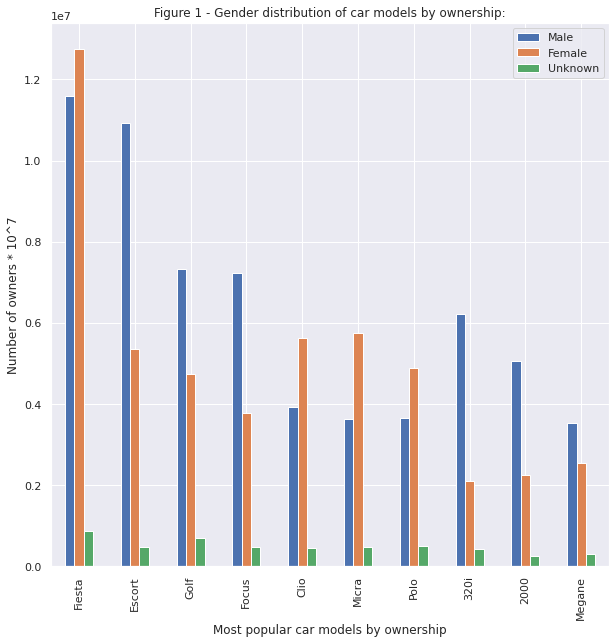

In [13]:
task21a.plot(kind='bar',  
            figsize=(10, 10), 
            xlabel="Most popular car models by ownership",
            ylabel="Number of owners * 10^7", 
            title="Figure 1 - Gender distribution of car models by ownership:")
plt.show()

In [14]:
task21b = task21a.copy(deep=True)
diff = []
for i in range(0, task21b.shape[0]):
    abs = task21b.iloc[i, 0] - task21b.iloc[i, 1]
    if (abs < 0):
        abs = -abs
    diff.append(abs)
task21b['Difference'] = diff
task21b.drop(columns=['Male', 'Female', 'Unknown'], inplace=True)
task21b

,Difference
Model,
Fiesta,1164265
Escort,5579381
Golf,2608233
Focus,3443909
Clio,1704879
Micra,2111144
Polo,1224999
320i,4122440
2000,2807811


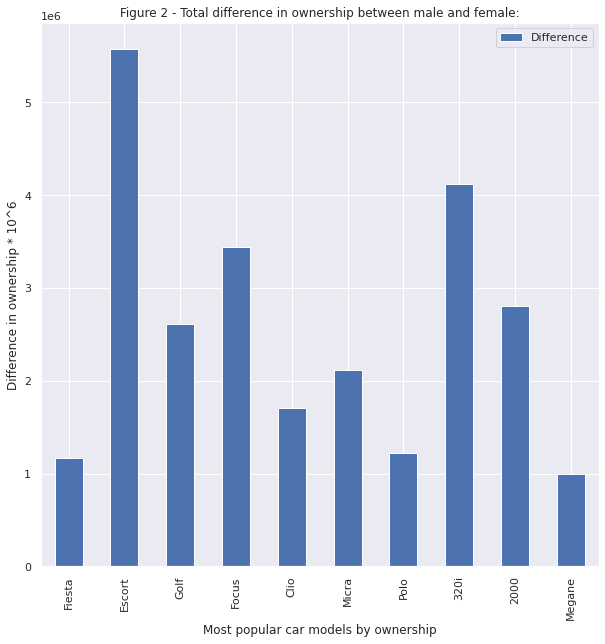

In [15]:
task21b.plot(kind='bar',
            figsize=(10, 10),
            xlabel="Most popular car models by ownership",
            ylabel="Difference in ownership * 10^6",
            title="Figure 2 - Total difference in ownership between male and female:")
plt.show()

In [16]:
task21c = df.copy(deep=True)
topmodels = ['Fiesta', 'Escort', 'Golf', 'Focus', 'Clio', 'Micra', 'Polo', '320i', '2000', 'Megane']
task21c.drop(columns=['Manufacturer', 'Fuel', 'Male', 'Female', 'Unknown', 'Total'], inplace=True)
task21c = task21c.groupby(by=['Model'], as_index=False, sort=False).mean()
task21c = task21c.loc[task21c['Model'].isin(topmodels)]
task21c.set_index('Model', inplace=True)
task21c = task21c.reindex(topmodels)
task21c

,Price,Transmission,Power,Engine CC
Model,,,,
Fiesta,18.532143,5.714286,68.571429,1166.142857
Escort,16.208744,4.461538,63.564103,1650.205128
Golf,31.242154,6.164835,89.461538,1537.406593
Focus,30.619322,5.966102,94.033898,1497.169492
Clio,22.100000,5.615385,75.576923,1219.653846
Micra,20.377609,4.869565,67.956522,1279.695652
Polo,18.192500,5.074074,60.962963,1408.055556
320i,47.848370,6.444444,126.111111,1995.777778
2000,17.182000,5.000000,74.000000,1994.000000


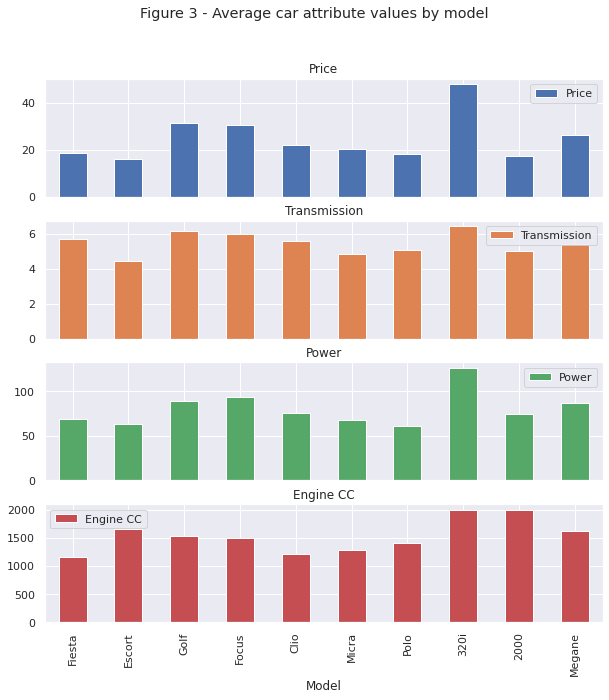

In [17]:
task21c.plot.bar(subplots=True,
                 figsize=(10, 10),
                 title="Figure 3 - Average car attribute values by model")
plt.show()

## Task 2.2 

In [18]:
# Code goes after this line by adding cells


In [19]:
task22 = df.copy(deep=True)
task22.drop(columns=['Manufacturer', 
                     'Model', 
                     'Transmission', 
                     'Engine CC', 
                     'Fuel', 
                     'Male', 
                     'Female', 
                     'Unknown', 
                     'Total'], 
            inplace=True)
task22

,Price,Power
0,30.619322,94.033898
1,31.242154,89.461538
2,22.100000,75.576923
3,47.848370,126.111111
4,18.192500,60.962963
...,...,...
5220,34.103571,121.857143
5221,108.747195,207.609756
5222,55.200000,163.500000
5223,30.081000,110.000000


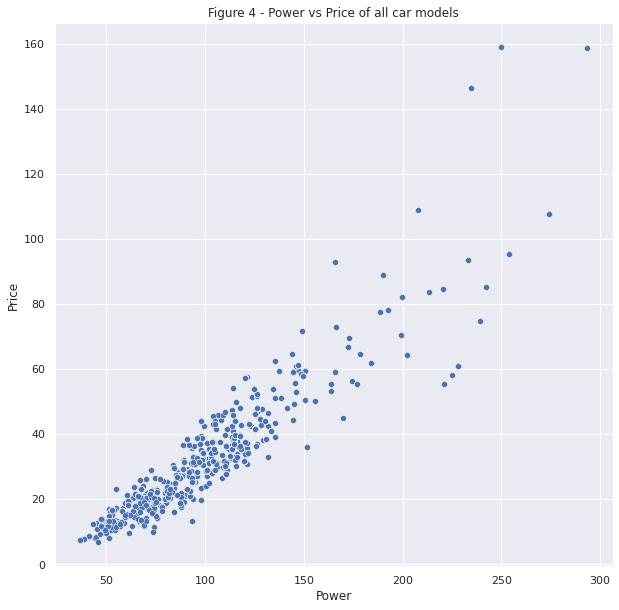

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Power', 
                y='Price', 
                data=task22).set(title='Figure 4 - Power vs Price of all car models')
plt.show()

## Task 2.3 

In [21]:
# Code goes after this line by adding cells


In [22]:
task23a = df.copy(deep=True)
task23a.drop(columns=['Manufacturer', 'Model', 'Female', 'Unknown','Total'], inplace=True)
task23a

,Price,Transmission,Power,Engine CC,Fuel,Male
0,30.619322,5.966102,94.033898,1497.169492,petrol,814172
1,31.242154,6.164835,89.461538,1537.406593,petrol,483216
2,22.100000,5.615385,75.576923,1219.653846,petrol,241287
3,47.848370,6.444444,126.111111,1995.777778,petrol,408016
4,18.192500,5.074074,60.962963,1408.055556,petrol,216333
...,...,...,...,...,...,...
5220,34.103571,4.571429,121.857143,2555.285714,petrol,1090
5221,108.747195,7.853659,207.609756,2304.975610,diesel,1012
5222,55.200000,6.000000,163.500000,2696.500000,petrol,790
5223,30.081000,4.000000,110.000000,2254.000000,petrol,639


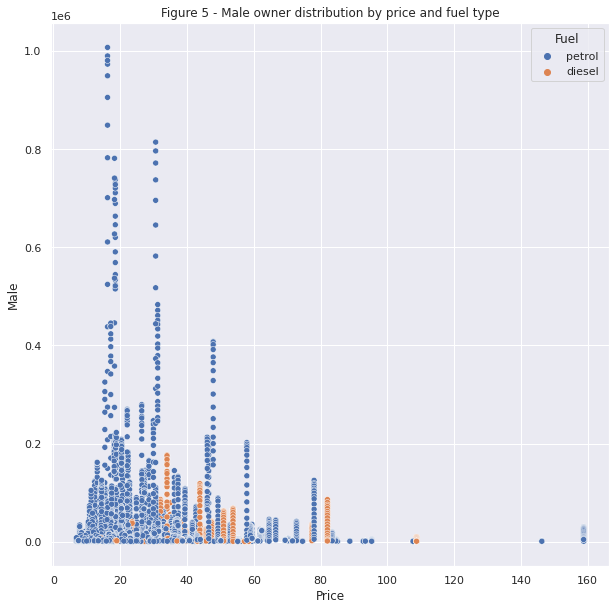

In [23]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Price', 
                y='Male', 
                hue='Fuel', 
                data=task23a).set(title='Figure 5 - Male owner distribution by price and fuel type')
plt.show()

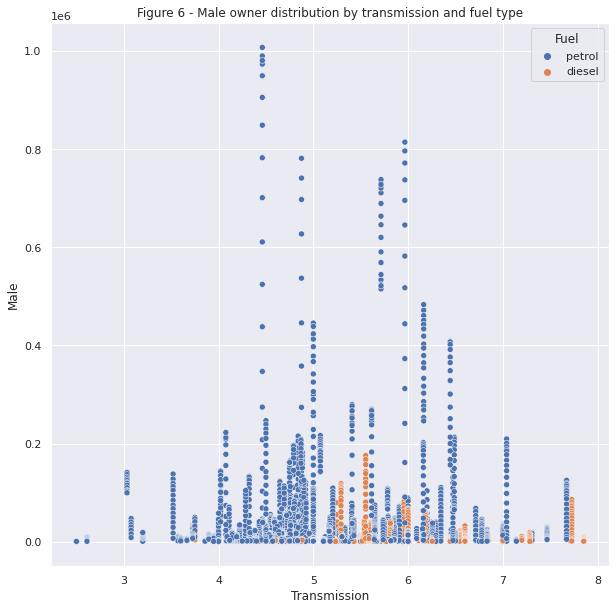

In [24]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Transmission', 
                y='Male', 
                hue='Fuel', 
                data=task23a).set(title='Figure 6 - Male owner distribution by transmission and fuel type')
plt.show()

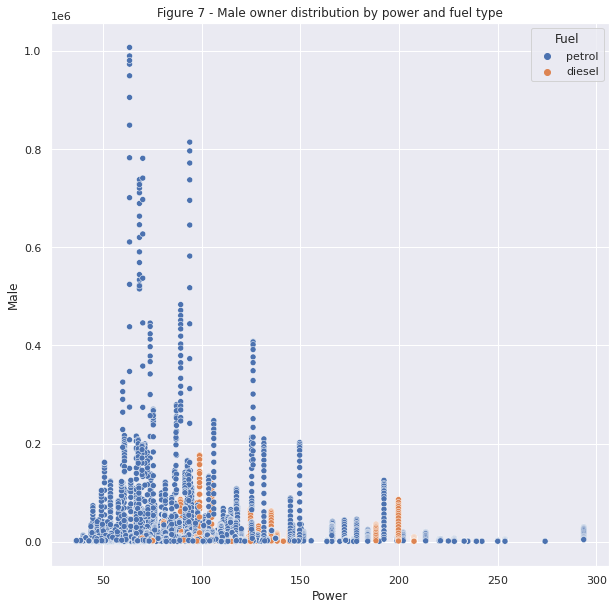

In [25]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Power', 
                y='Male', 
                hue='Fuel', 
                data=task23a).set(title='Figure 7 - Male owner distribution by power and fuel type')
plt.show()

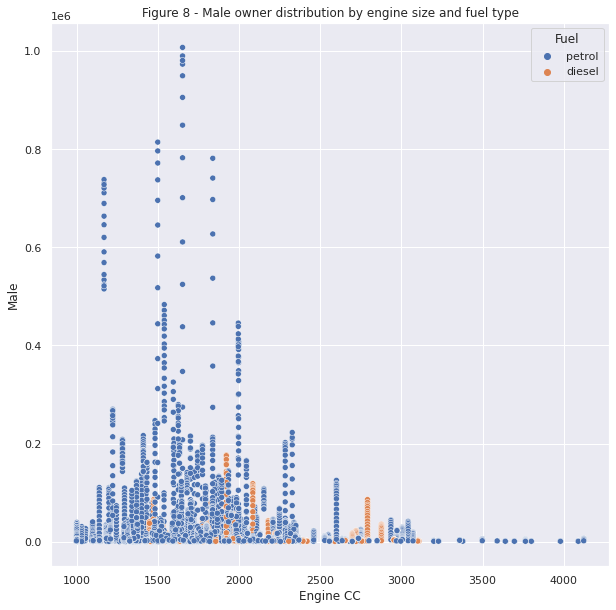

In [26]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Engine CC', 
                y='Male', 
                hue='Fuel', 
                data=task23a).set(title='Figure 8 - Male owner distribution by engine size and fuel type')
plt.show()

In [27]:
task23b = task23a.copy(deep=True)
task23b.drop(columns=['Price', 'Transmission', 'Power', 'Engine CC'], inplace=True)
task23b = task23b.groupby(by=['Fuel'], as_index=False, sort=False).sum()
task23b

,Fuel,Male
0,petrol,166075590
1,diesel,12119785


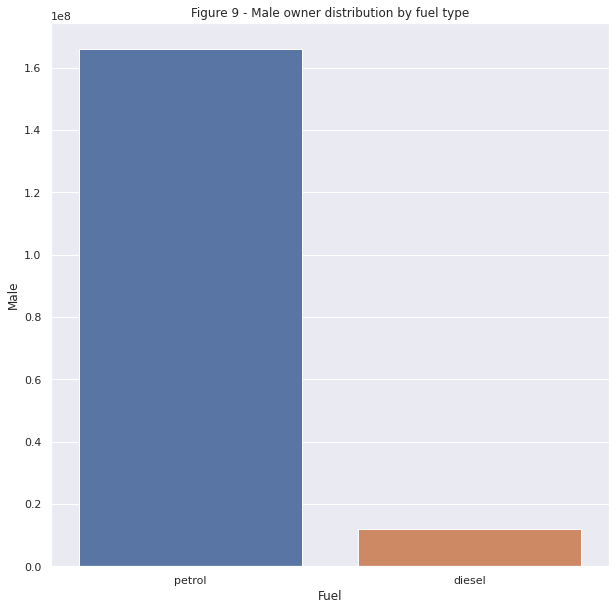

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(x='Fuel', 
            y='Male', 
            data=task23b).set(title='Figure 9 - Male owner distribution by fuel type')
plt.show()